In [12]:
from ovito.io import import_file, export_file
import ovito.modifiers as m#import BondAnalysisModifier, CreateBondsModifier,CoordinationAnalysisModifier,TimeSeriesModifier
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

coordList=[0,1,2,3,4]
l=len(coordList)
def coordinationTimeseries(file):

    # try: 
    pipeline = import_file(file)
    
    numframes=pipeline.source.num_frames

  
    pipeline.modifiers.append(m.SelectTypeModifier(property = 'Particle Type', types = {'Si'}))
    pipeline.modifiers.append(m.CoordinationAnalysisModifier(cutoff = 2, number_of_bins = 200,partial=True))
    pipeline.modifiers.append(m.HistogramModifier(bin_count=200, property='Coordination',only_selected=True))
    #pipeline.modifiers.append(m.TimeSeriesModifier(operate_on='HistogramModifier.Coordination'))
    
    
    ts=np.empty([numframes,l]) 
    t=np.arange(numframes)
    for i in t:
        
        data = pipeline.compute(i)
    # # print(data.objects.Count)
    # for o in data.objects:
    #     print(o)
        
        ea = np.array(data.tables['histogram[Coordination]'].xy())
        e=ea[:,0]
        
        for n in np.arange(l):
            ind=np.argmin(np.abs(e-coordList[n]))
            ts[i,n]=ea[ind][1]

        
    for n in np.arange(l):
        val=ts[:,n]
        lstr=coordList[n]
        plt.plot(t,val,label=lstr)

    plt.axvline(x=120)
    plt.axvline(x=240)
    plt.axvline(x=360)
    plt.axvline(x=480)
    plt.axvline(x=600)
    plt.legend(loc='upper left',title='Coordination Number')
    plt.xlabel('Timestep(2500fs)')
    plt.ylabel('Count')
    plt.show()
    # df = pd.DataFrame(e, columns=['word', 'frequency'])
    # df.plot(kind='bar', x='word')
    # print(data.tables['histogram[Coordination]'].xy())
    
    
    
    # except:
    #     print(' b ')
    #print(data.tables['time-series'].xy())
    return ts
    
        
    
    
        
        

def bondAnalysis(file):
    try: 
        pipeline = import_file(os.path.join(iroot,f))
        
        numframes=pipeline.source.num_frames
    
        pipeline.modifiers.append(CreateBondsModifier(cutoff = 2))
        pipeline.modifiers.append(BondAnalysisModifier(partition=BondAnalysisModifier.Partition.ByParticleType,bins = 200))
        
        # Export bond angle distribution to an output text file.
        #export_file(pipeline, 'output/bond_angles.txt', 'txt/table', key='bond-angle-distr', end_frame=1)

        # Convert bond length histogram to a NumPy array and print it to the terminal.
        data = pipeline.compute(numframes-1)
    except:
        i=1
        
    # if numframes < 20:
    #     continue
    print(d + ' with '+str(numframes)+' frames.')
    # if np.isclose(peakLen,realLen,atol=errLen) and np.isclose(peakAngle,realAngle,atol=errAng):


    
    
    angleTables=data.tables['bond-angle-distr'].xy()
    angleTypes=data.tables['bond-angle-distr'].y
    angleBins = angleTables[:,0]
    
    for column, name in enumerate(angleTypes.component_names):
        if name != 'Si-O-Si' and name != 'O-Si-O':
            continue
        
        angleCounts=angleTypes[:,column]
        
        peakAngle=angleBins[np.argmax(angleCounts)]
        angTitle= "Angle distribution for bond types:{} with a max angle of {:.1f}".format(name,peakAngle)
        plt.bar(angleBins,angleCounts)
        plt.title(angTitle)
        plt.xlabel('Angle(Degrees)')
        plt.ylabel('Count')
        plt.show()
    
    
    lenTables=data.tables['bond-length-distr'].xy()
    bondTypes=data.tables['bond-length-distr'].y
    bondBins=lenTables[:,0]
    
    for column, name in enumerate(bondTypes.component_names):
        # if name != 'Si-O-Si' and name != 'O-Si-O':
        #     continue
        bondCounts=bondTypes[:,column]

        peakLen=bondBins[np.argmax(bondCounts)]
        lenTitle= "Bond length distribution for bond types:{} with peak at {:.2f}".format(name,peakLen)
        
        
        # max_y_lim = max(counts) + 500
        # print(max_y_lim)
        # min_y_lim = min(counts)
        
        # plt.ylim(min_y_lim, max_y_lim)
        plt.title(lenTitle)
        plt.xlabel('Length(r’$\AA$’')
        plt.bar(bondBins,bondCounts)
        plt.show()

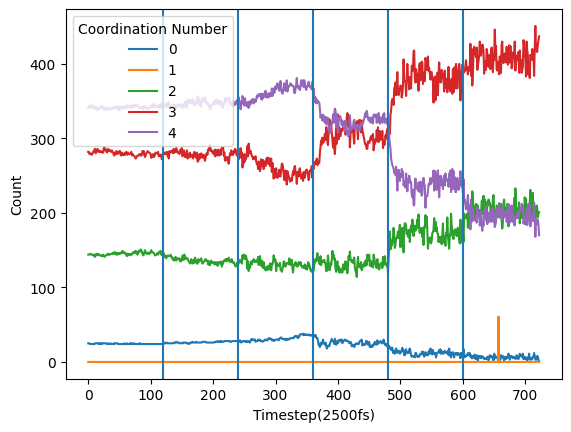

[[ 25.   0. 144. 282. 341.]
 [ 25.   0. 144. 282. 341.]
 [ 25.   0. 144. 279. 344.]
 ...
 [  7.   0. 194. 427. 191.]
 [  2.   0. 199. 432. 183.]
 [  1.   0. 201. 437. 170.]]


In [13]:
folder='/home/agoga/topcon/sandbox/'

f='CreateAmorphSiOx.dump'
  

e=coordinationTimeseries(os.path.join('/home/agoga/topcon/sandbox/'+f))


print(e)
